In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow import keras

In [44]:

(x_train,y_train),(X_test,y_test) = tf.keras.datasets.boston_housing.load_data()

In [17]:
scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler.transform(y_test.reshape(-1,1))

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape = (x_train_scaled.shape[1],),activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = None)
])

c:\Users\91951\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [28]:
history = model.fit(x_train_scaled,y_train_scaled,epochs=50,batch_size=64,validation_data=(X_test_scaled,y_test_scaled))

test_loss = model.evaluate(X_test_scaled,y_test_scaled)
print('testloss:',test_loss)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0468 - val_loss: 0.1927
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0543 - val_loss: 0.1977
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - val_loss: 0.1903
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0555 - val_loss: 0.1812
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0638 - val_loss: 0.1913
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - val_loss: 0.1825
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - val_loss: 0.1873
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - val_loss: 0.1879
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0526 - val_loss: 0.1844
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0480 - val_loss: 0.1804
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - val_loss: 0.1869
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0571 - val_loss: 0.1663
Epoch 13/50


In [29]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [31]:
from sklearn.metrics import r2_score

In [32]:
r2 = r2_score(y_pred,y_test_scaled)
r2

0.8189099746757098

<Axes: >

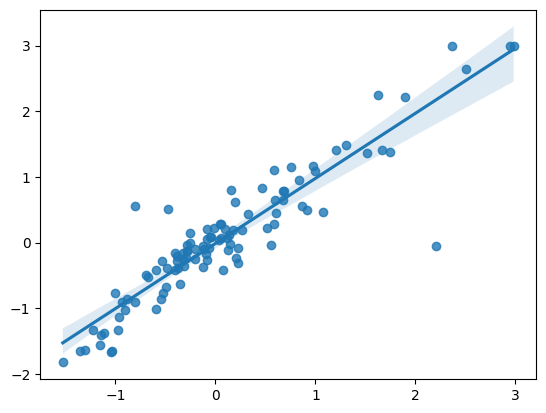

In [36]:
sns.regplot(x=y_pred,y=y_test_scaled)